In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_Ashrae.csv')
df.head()

,Season,Building type,Cooling startegy_building level,Climate,Thermal sensation,Koppen climate classification,Clo,Met,Thermal preference,Relative humidity,Air velocity,Country,Air temperature
0,2,2,0,5,-1.3,5,0.57,1.0,1,36.8,0.27,15,24.3
1,2,2,0,5,-1.4,5,0.57,1.1,1,33.1,0.09,15,25.7
2,2,2,0,5,0.6,5,0.57,1.1,1,34.9,0.06,15,24.6
3,2,2,0,5,0.5,5,0.57,1.0,1,31.7,0.13,15,26.4
4,2,2,0,5,1.6,5,0.57,1.0,1,33.3,0.07,15,25.0


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)

In [23]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [24]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = rf_model.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6153
           1       0.79      0.77      0.78      4046
           2       0.73      0.64      0.68      2044

    accuracy                           0.77     12243
   macro avg       0.76      0.74      0.75     12243
weighted avg       0.77      0.77      0.77     12243



In [26]:
accuracy_score(y_test,y_pred)

0.7699093359470718

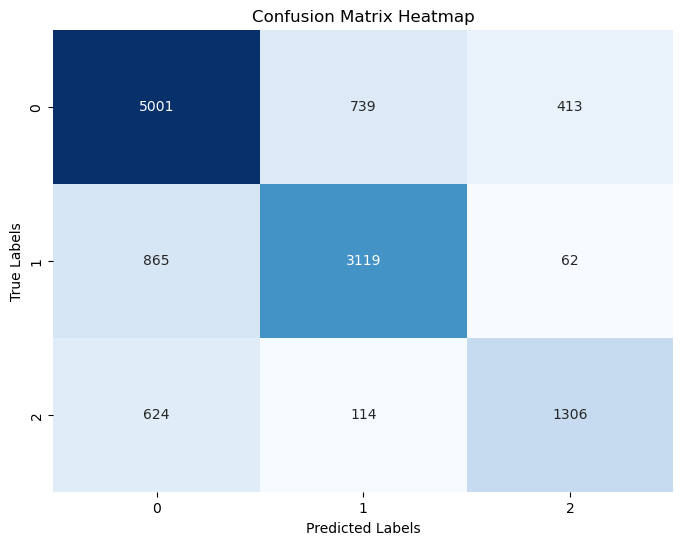

In [33]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

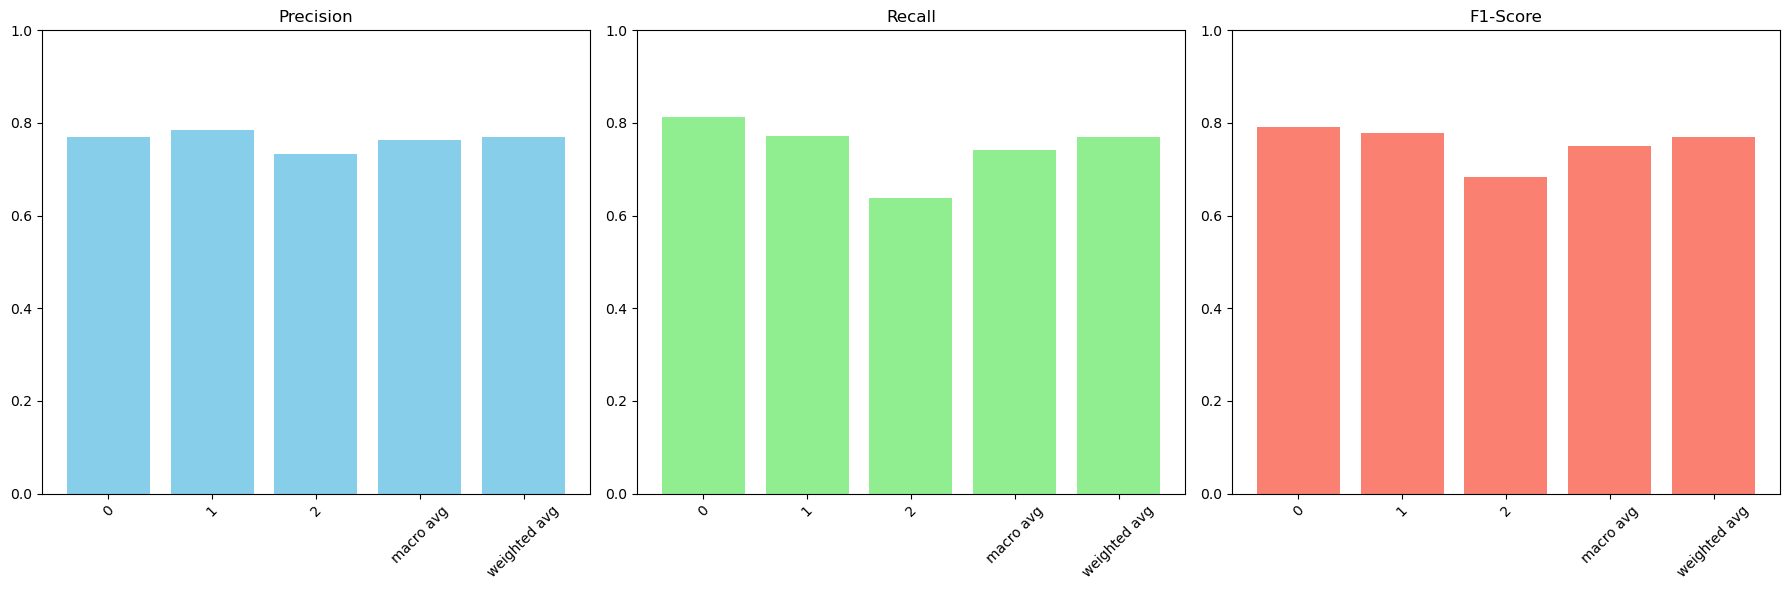

In [35]:
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score values
precision = [report[class_label]['precision'] for class_label in report if class_label != 'accuracy']
recall = [report[class_label]['recall'] for class_label in report if class_label != 'accuracy']
f1_score = [report[class_label]['f1-score'] for class_label in report if class_label != 'accuracy']
class_labels = [class_label for class_label in report if class_label != 'accuracy']

# Plot Precision, Recall, and F1-Score
x = np.arange(len(class_labels))  # Class labels are the x-axis

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
axes[0].bar(x, precision, color='skyblue')
axes[0].set_title('Precision')
axes[0].set_xticks(x)
axes[0].set_xticklabels(class_labels, rotation=45)
axes[0].set_ylim(0, 1)

# Plot Recall
axes[1].bar(x, recall, color='lightgreen')
axes[1].set_title('Recall')
axes[1].set_xticks(x)
axes[1].set_xticklabels(class_labels, rotation=45)
axes[1].set_ylim(0, 1)

# Plot F1-Score
axes[2].bar(x, f1_score, color='salmon')
axes[2].set_title('F1-Score')
axes[2].set_xticks(x)
axes[2].set_xticklabels(class_labels, rotation=45)
axes[2].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt_model= DecisionTreeClassifier()

In [49]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt_model.predict(X_test)

In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6230
           1       0.69      0.71      0.70      3923
           2       0.60      0.59      0.59      2090

    accuracy                           0.69     12243
   macro avg       0.67      0.67      0.67     12243
weighted avg       0.69      0.69      0.69     12243



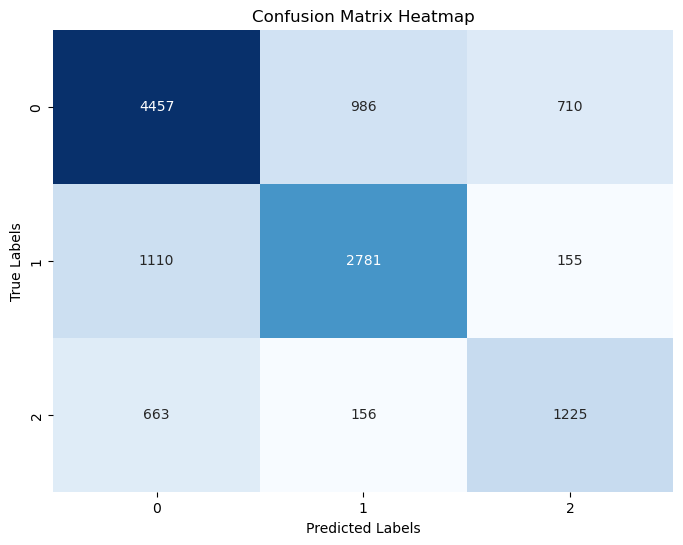

In [55]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

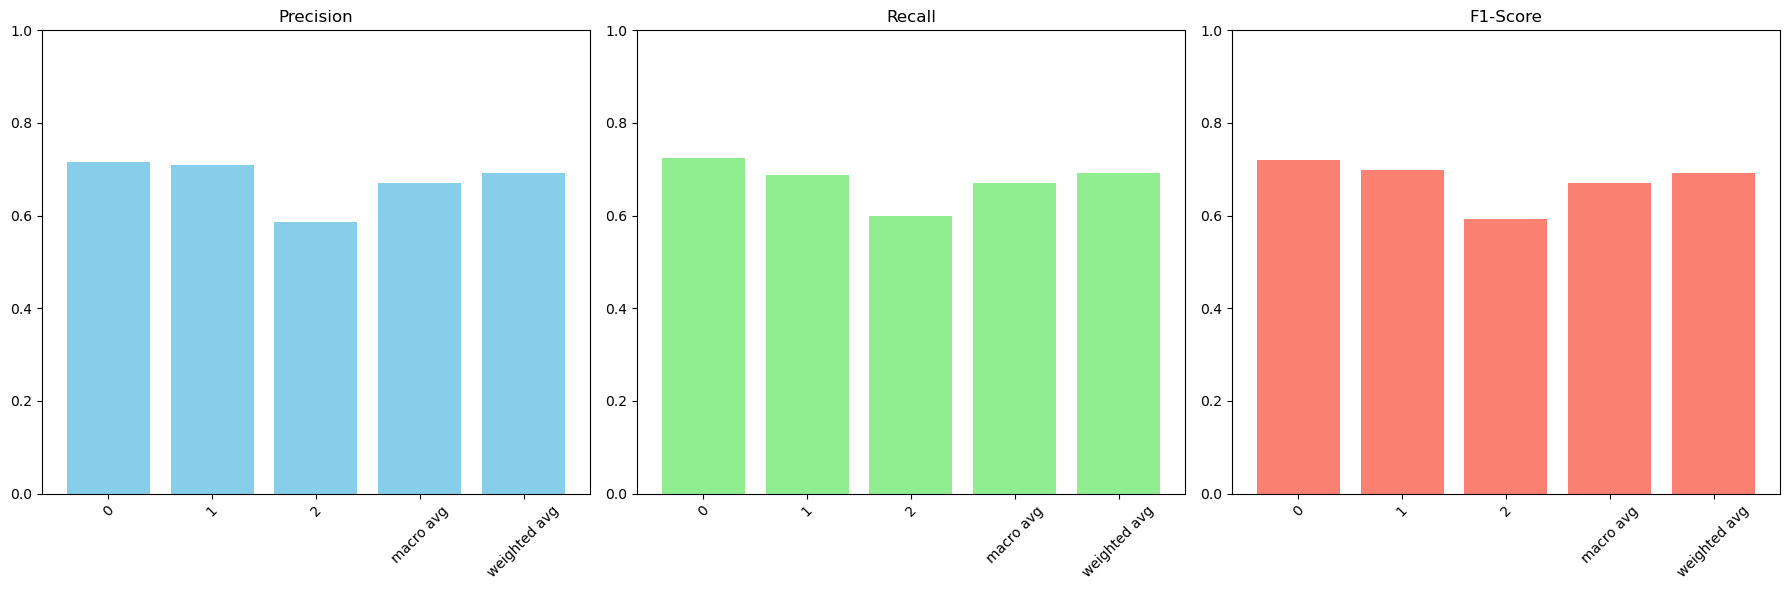

In [57]:
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score values
precision = [report[class_label]['precision'] for class_label in report if class_label != 'accuracy']
recall = [report[class_label]['recall'] for class_label in report if class_label != 'accuracy']
f1_score = [report[class_label]['f1-score'] for class_label in report if class_label != 'accuracy']
class_labels = [class_label for class_label in report if class_label != 'accuracy']

# Plot Precision, Recall, and F1-Score
x = np.arange(len(class_labels))  # Class labels are the x-axis

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
axes[0].bar(x, precision, color='skyblue')
axes[0].set_title('Precision')
axes[0].set_xticks(x)
axes[0].set_xticklabels(class_labels, rotation=45)
axes[0].set_ylim(0, 1)

# Plot Recall
axes[1].bar(x, recall, color='lightgreen')
axes[1].set_title('Recall')
axes[1].set_xticks(x)
axes[1].set_xticklabels(class_labels, rotation=45)
axes[1].set_ylim(0, 1)

# Plot F1-Score
axes[2].bar(x, f1_score, color='salmon')
axes[2].set_title('F1-Score')
axes[2].set_xticks(x)
axes[2].set_xticklabels(class_labels, rotation=45)
axes[2].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()

In [61]:
import xgboost as xgb
model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=3,  # Set the number of classes in your target
    eval_metric='mlogloss',  # log-loss metric for multi-class classification
    max_depth=6,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size for gradient descent
    n_estimators=100,  # Number of boosting rounds
    subsample=0.8,  # Subsample ratio of the training set
    colsample_bytree=0.8  # Subsample ratio of columns when constructing each tree
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Test Accuracy: 0.7728
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      6153
           1       0.78      0.78      0.78      4046
           2       0.76      0.63      0.69      2044

    accuracy                           0.77     12243
   macro avg       0.77      0.74      0.75     12243
weighted avg       0.77      0.77      0.77     12243



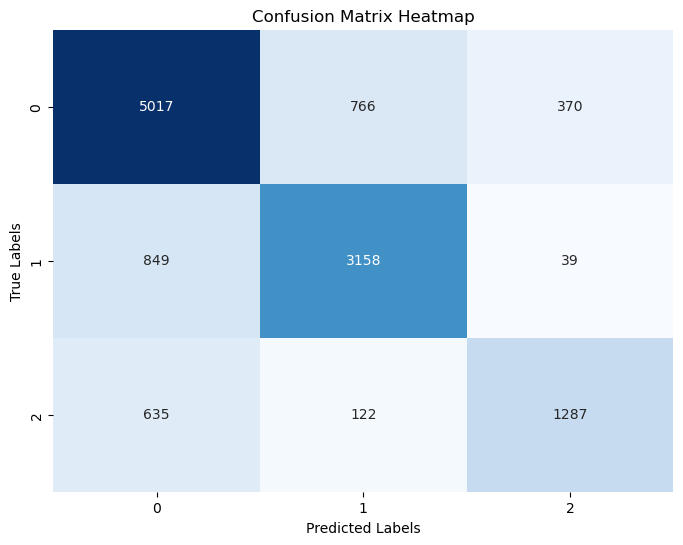

In [63]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

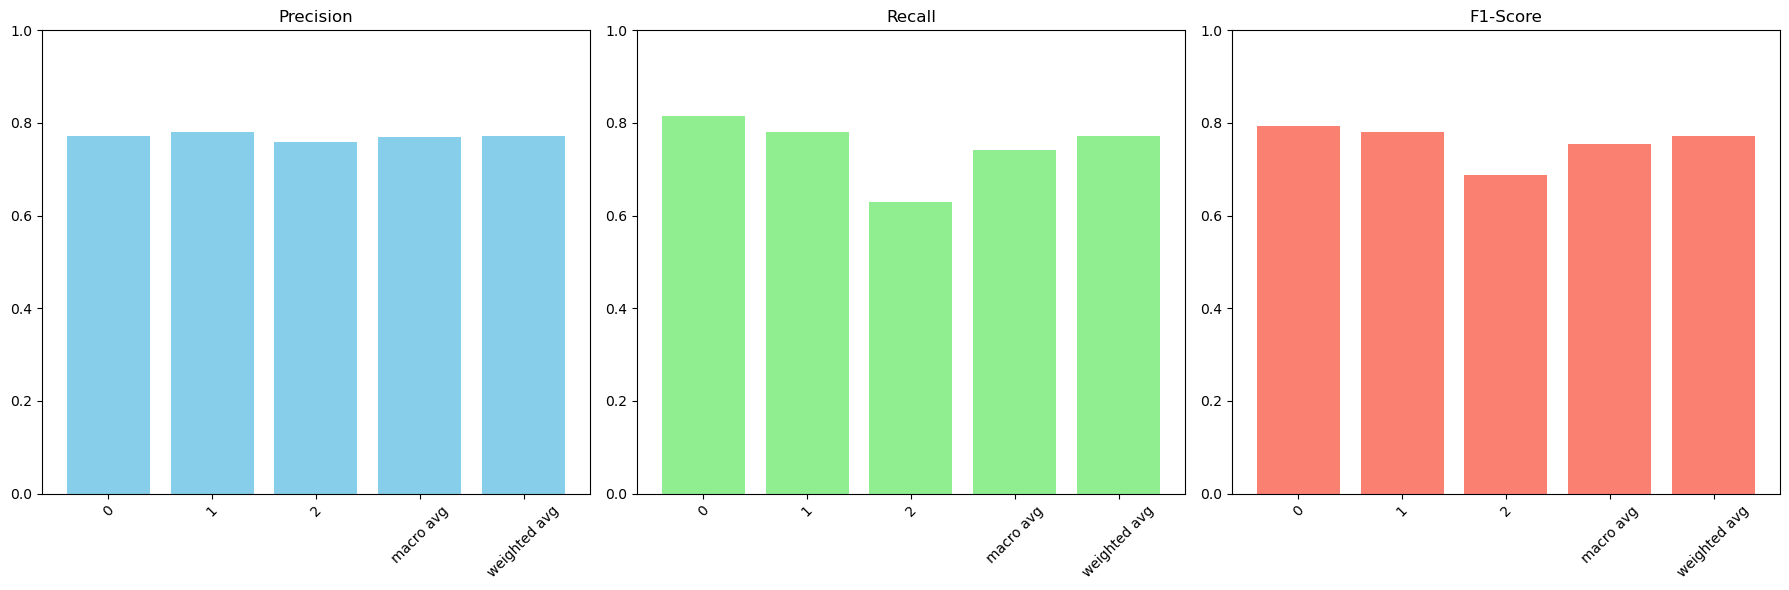

In [65]:
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score values
precision = [report[class_label]['precision'] for class_label in report if class_label != 'accuracy']
recall = [report[class_label]['recall'] for class_label in report if class_label != 'accuracy']
f1_score = [report[class_label]['f1-score'] for class_label in report if class_label != 'accuracy']
class_labels = [class_label for class_label in report if class_label != 'accuracy']

# Plot Precision, Recall, and F1-Score
x = np.arange(len(class_labels))  # Class labels are the x-axis

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
axes[0].bar(x, precision, color='skyblue')
axes[0].set_title('Precision')
axes[0].set_xticks(x)
axes[0].set_xticklabels(class_labels, rotation=45)
axes[0].set_ylim(0, 1)

# Plot Recall
axes[1].bar(x, recall, color='lightgreen')
axes[1].set_title('Recall')
axes[1].set_xticks(x)
axes[1].set_xticklabels(class_labels, rotation=45)
axes[1].set_ylim(0, 1)

# Plot F1-Score
axes[2].bar(x, f1_score, color='salmon')
axes[2].set_title('F1-Score')
axes[2].set_xticks(x)
axes[2].set_xticklabels(class_labels, rotation=45)
axes[2].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()